In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/laptops_train.csv")
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [13]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [14]:
df.dropna(inplace=True)

<Axes: >

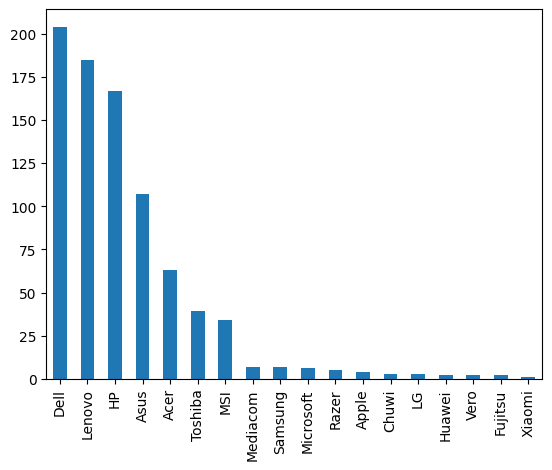

In [17]:
df['Manufacturer'].value_counts().plot(kind ='bar')

In [22]:
df.drop(columns = ['Model Name'] , inplace = True)

In [49]:
df["Touchscreen"] = df['Screen'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: >

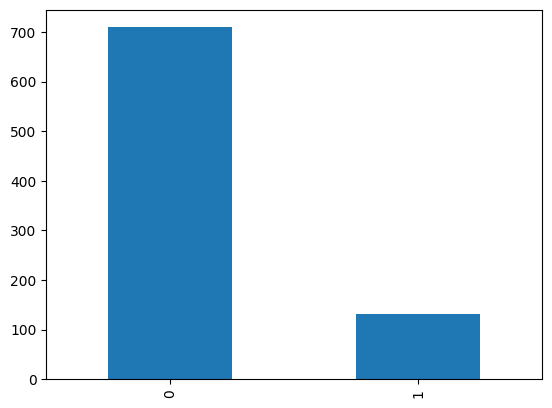

In [51]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

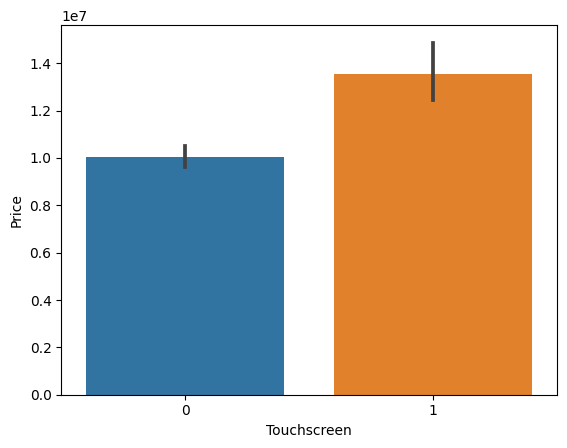

In [52]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])


In [55]:
df["IPS"] = df['Screen'].apply(lambda x:1 if "IPS" in x else 0)

In [56]:
df.sample(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS
123,HP,Notebook,"17.3""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce 930MX,Windows,10,2.5kg,11301732.0,0,0
160,Asus,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows,10,2.03kg,3583476.0,0,0
756,HP,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,10,2.2kg,9772308.0,0,1


<Axes: xlabel='IPS', ylabel='Price'>

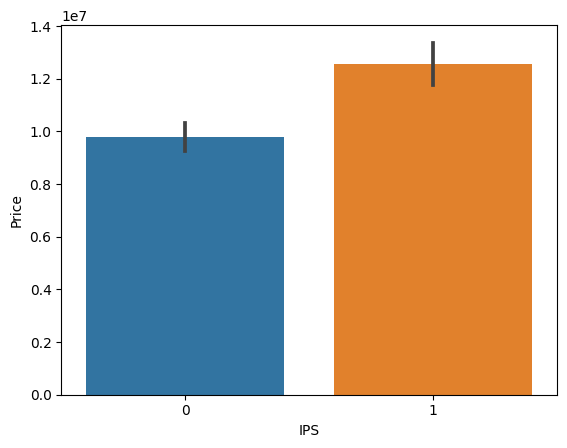

In [57]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [59]:
new = df['Screen'].str.split('x',n=1,expand=True)

In [60]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [61]:
df

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,X_res,Y_res
5,Acer,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00,0,0,1366,768
6,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24,0,1,IPS Panel Retina Display 2880,1800
8,Asus,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00,0,0,Full HD 1920,1080
9,Acer,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00,0,1,IPS Panel Full HD 1920,1080
13,Dell,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,4436218.80,0,0,Full HD 1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00,0,0,Full HD 1920,1080
973,Toshiba,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00,0,0,Full HD 1920,1080
974,Asus,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80,0,0,Full HD 1920,1080
975,HP,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00,0,1,IPS Panel Full HD 1920,1080


In [64]:
df['X_res'] =df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [65]:
df.sample(5)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,X_res,Y_res
495,Lenovo,Ultrabook,"12.5""",IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,8GB,1GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,9772308.0,0,1,1366,768
260,Dell,Notebook,"17.3""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows,10,2.8kg,10154664.0,0,0,1920,1080
856,Asus,Notebook,"15.6""",1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows,10,2kg,3992508.0,0,0,1366,768
330,MSI,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.7kg,10661508.0,0,0,1920,1080
797,Dell,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows,10,1.95kg,7202520.0,0,0,1366,768


In [66]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 5 to 976
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              841 non-null    object 
 1   Category                  841 non-null    object 
 2   Screen Size               841 non-null    object 
 3   Screen                    841 non-null    object 
 4   CPU                       841 non-null    object 
 5   RAM                       841 non-null    object 
 6   Storage                   841 non-null    object 
 7   GPU                       841 non-null    object 
 8   Operating System          841 non-null    object 
 9   Operating System Version  841 non-null    object 
 10  Weight                    841 non-null    object 
 11  Price                     841 non-null    float64
 12  Touchscreen               841 non-null    int64  
 13  IPS                       841 non-null    int64  
 14  X_res     

In [70]:
df['Screen Size']= df['Screen Size'].str.replace('"', '').str.extract(r'(\d+\.\d+)').astype(float)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 5 to 976
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              841 non-null    object 
 1   Category                  841 non-null    object 
 2   Screen Size               841 non-null    float64
 3   Screen                    841 non-null    object 
 4   CPU                       841 non-null    object 
 5   RAM                       841 non-null    object 
 6   Storage                   841 non-null    object 
 7   GPU                       841 non-null    object 
 8   Operating System          841 non-null    object 
 9   Operating System Version  841 non-null    object 
 10  Weight                    841 non-null    object 
 11  Price                     841 non-null    float64
 12  Touchscreen               841 non-null    int64  
 13  IPS                       841 non-null    int64  
 14  X_res     

In [72]:
df.corr()['Price']

<ipython-input-72-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Screen Size    0.093556
Price          1.000000
Touchscreen    0.200005
IPS            0.199816
X_res          0.553315
Y_res          0.549849
Name: Price, dtype: float64

In [74]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Screen Size']).astype('float')

In [75]:
df.sample(5)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
722,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.32kg,13329108.0,0,1,1920,1080,157.350512
452,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.31kg,13640328.0,0,1,1920,1080,141.211998
597,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Intel HD Graphics 630,Windows,10,1.7kg,13106808.0,0,1,1920,1080,157.350512
120,Acer,Notebook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.1kg,4259268.0,1,1,1920,1080,141.211998
670,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows,10 S,1.252kg,16608922.2,1,0,2256,1504,200.842560


In [76]:
df.corr()['Price']

<ipython-input-76-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Screen Size    0.093556
Price          1.000000
Touchscreen    0.200005
IPS            0.199816
X_res          0.553315
Y_res          0.549849
ppi            0.469882
Name: Price, dtype: float64

In [77]:
df.drop(columns=['Screen'],inplace=True)
df.drop(columns=['Screen Size','X_res','Y_res'],inplace=True)

In [78]:
df.sample(5)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,ppi
85,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.65kg,11995308.0,0,1,141.211998
525,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,7,2.02kg,11915280.0,0,0,157.350512
79,HP,Notebook,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.5kg,8687484.0,0,0,127.335675
244,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.38kg,9594468.0,1,1,158.482530
590,Asus,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows,10,2.2kg,6571188.0,1,0,100.454670


In [79]:
df['Category'].value_counts()

Notebook              455
Gaming                139
Ultrabook             134
2 in 1 Convertible     78
Workstation            24
Netbook                11
Name: Category, dtype: int64

In [82]:
df['RAM'] = df['RAM'].str.replace('GB' , ' ')

In [84]:
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz       131
Intel Core i7 7700HQ 2.8GHz      113
Intel Core i7 7500U 2.7GHz        94
Intel Core i7 8550U 1.8GHz        66
Intel Core i5 8250U 1.6GHz        66
                                ... 
AMD A6-Series A6-9220 2.5GHz       1
Intel Core i7 7560U 2.4GHz         1
Intel Core M 7Y30 1.0GHz           1
Intel Xeon E3-1535M v6 3.1GHz      1
Intel Core i5 7200U 2.70GHz        1
Name: CPU, Length: 88, dtype: int64

In [86]:
df['CPU'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [87]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [88]:
df['Cpu brand'] = df['CPU'].apply(fetch_processor)

In [89]:
df.head(4)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
5,Acer,Notebook,AMD A9-Series 9420,4,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00,0,0,100.454670,AMD Processor
6,Apple,Ultrabook,Intel Core i7,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24,0,1,220.534624,Intel Core i7
8,Asus,Ultrabook,Intel Core i7,16,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00,0,0,157.350512,Intel Core i7
9,Acer,Ultrabook,Intel Core i5,8,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00,0,1,157.350512,Intel Core i5


<Axes: >

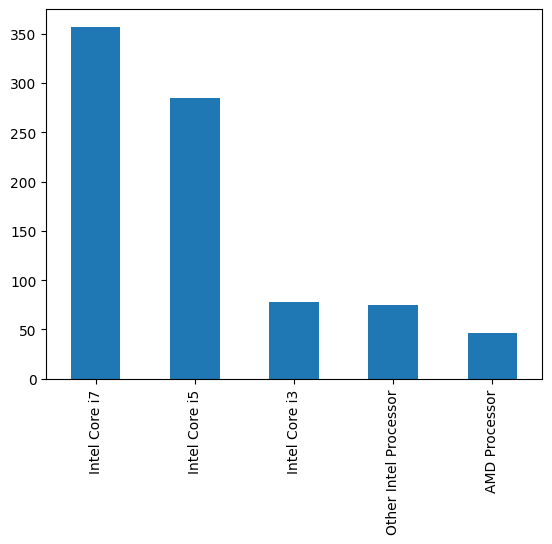

In [90]:
df['Cpu brand'].value_counts().plot(kind='bar')

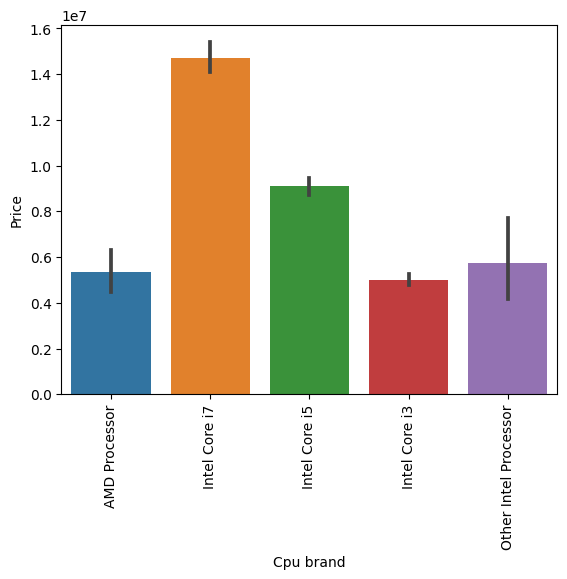

In [91]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [92]:
df.drop(columns=['CPU'],inplace=True)

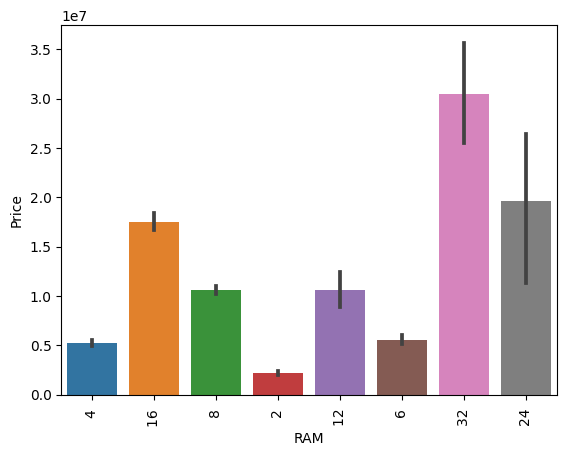

In [93]:
sns.barplot(x=df['RAM'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
df['Storage'].value_counts()

256GB SSD                        287
1TB HDD                          127
512GB SSD                         83
128GB SSD +  1TB HDD              67
500GB HDD                         66
128GB SSD                         54
256GB SSD +  1TB HDD              51
32GB Flash Storage                21
512GB SSD +  1TB HDD              13
1TB SSD                           11
2TB HDD                           10
256GB SSD +  2TB HDD               9
64GB Flash Storage                 5
32GB SSD                           5
256GB Flash Storage                4
1GB SSD                            4
128GB Flash Storage                3
128GB SSD +  2TB HDD               2
512GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
240GB SSD                          1
32GB HDD                           1
8GB SSD                            1
128GB HDD                          1
512GB Flash Storage                1
512GB SSD +  512GB SSD             1
1

In [97]:
df['Storage'] = df['Storage'].astype(str).replace('\.0', '', regex=True)
df["Storage"] = df["Storage"].str.replace('GB', '')
df["Storage"] = df["Storage"].str.replace('TB', '000')
new = df["Storage"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-97-b8e1e1a8f8f2>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-97-b8e1e1a8f8f2>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [98]:
df.head()

,Manufacturer,Category,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00,0,0,100.454670,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24,0,1,220.534624,Intel Core i7,0,0,0,256
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00,0,0,157.350512,Intel Core i7,0,512,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00,0,1,157.350512,Intel Core i5,0,256,0,0
13,Dell,Notebook,4,256 SSD,AMD Radeon R5 M430,Windows,10,2.2kg,4436218.80,0,0,141.211998,Intel Core i3,0,256,0,0


In [99]:
df.drop(columns=['Storage'],inplace=True)

In [100]:
df.head(4)

,Manufacturer,Category,RAM,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
5,Acer,Notebook,4,AMD Radeon R5,Windows,10,2.1kg,3556800.00,0,0,100.454670,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24,0,1,220.534624,Intel Core i7,0,0,0,256
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00,0,0,157.350512,Intel Core i7,0,512,0,0
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00,0,1,157.350512,Intel Core i5,0,256,0,0


In [101]:
df['GPU'].value_counts()

Intel HD Graphics 620      210
Intel HD Graphics 520       83
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     49
AMD Radeon 530              34
                          ... 
Nvidia GeForce GTX 960       1
AMD Radeon R5 520            1
AMD Radeon R7 M440           1
AMD R17M-M1-70               1
AMD Radeon R9 M385           1
Name: GPU, Length: 91, dtype: int64

In [108]:
df['GPU_Name'] = df['GPU'].str.split(" ").str.get(0)

In [109]:
df['GPU_Name'].value_counts()

Intel     450
Nvidia    275
AMD       116
Name: GPU_Name, dtype: int64

In [111]:
df.drop(columns = ['GPU' , 'Hybrid','Flash_Storage'] , inplace = True)

In [112]:
df.head()

,Manufacturer,Category,RAM,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,GPU_Name
5,Acer,Notebook,4,Windows,10,2.1kg,3556800.00,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Mac OS,X,2.04kg,19028613.24,0,1,220.534624,Intel Core i7,0,0,Intel
8,Asus,Ultrabook,16,Windows,10,1.3kg,13293540.00,0,0,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Windows,10,1.6kg,6846840.00,0,1,157.350512,Intel Core i5,0,256,Intel
13,Dell,Notebook,4,Windows,10,2.2kg,4436218.80,0,0,141.211998,Intel Core i3,0,256,AMD


In [114]:
df['Operating System'].value_counts()

Windows    837
Mac OS       4
Name: Operating System, dtype: int64

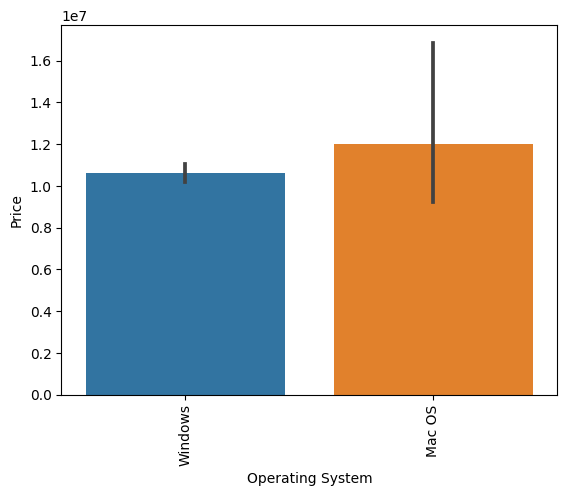

In [115]:
sns.barplot(x=df['Operating System'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 5 to 976
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              841 non-null    object 
 1   Category                  841 non-null    object 
 2   RAM                       841 non-null    object 
 3   Operating System          841 non-null    object 
 4   Operating System Version  841 non-null    object 
 5   Weight                    841 non-null    object 
 6   Price                     841 non-null    float64
 7   Touchscreen               841 non-null    int64  
 8   IPS                       841 non-null    int64  
 9   ppi                       841 non-null    float64
 10  Cpu brand                 841 non-null    object 
 11  HDD                       841 non-null    int64  
 12  SSD                       841 non-null    int64  
 13  GPU_Name                  841 non-null    object 
dtypes: float64

In [118]:
df['RAM'] = df['RAM'].astype("int")

In [124]:
df['Weight'] = df['Weight'].str.replace('kg' , ' ')

In [125]:
df.head()

,Manufacturer,Category,RAM,Operating System,Operating System Version,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,GPU_Name
5,Acer,Notebook,4,Windows,10,2.1,3556800.00,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Mac OS,X,2.04,19028613.24,0,1,220.534624,Intel Core i7,0,0,Intel
8,Asus,Ultrabook,16,Windows,10,1.3,13293540.00,0,0,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Windows,10,1.6,6846840.00,0,1,157.350512,Intel Core i5,0,256,Intel
13,Dell,Notebook,4,Windows,10,2.2,4436218.80,0,0,141.211998,Intel Core i3,0,256,AMD


In [126]:
df.drop(columns = ['Operating System Version'] , inplace = True)

In [127]:
df

,Manufacturer,Category,RAM,Operating System,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,GPU_Name
5,Acer,Notebook,4,Windows,2.1,3556800.00,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Mac OS,2.04,19028613.24,0,1,220.534624,Intel Core i7,0,0,Intel
8,Asus,Ultrabook,16,Windows,1.3,13293540.00,0,0,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Windows,1.6,6846840.00,0,1,157.350512,Intel Core i5,0,256,Intel
13,Dell,Notebook,4,Windows,2.2,4436218.80,0,0,141.211998,Intel Core i3,0,256,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Gaming,32,Windows,4.42,24897600.00,0,0,127.335675,Intel Core i7,1000,256,Nvidia
973,Toshiba,Notebook,8,Windows,1.95,10492560.00,0,0,157.350512,Intel Core i5,0,256,Intel
974,Asus,Gaming,16,Windows,2.73,18227710.80,0,0,127.335675,Intel Core i7,1000,256,Nvidia
975,HP,Notebook,8,Windows,2.04,8705268.00,0,1,141.211998,Intel Core i5,1000,128,Nvidia


<ipython-input-128-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

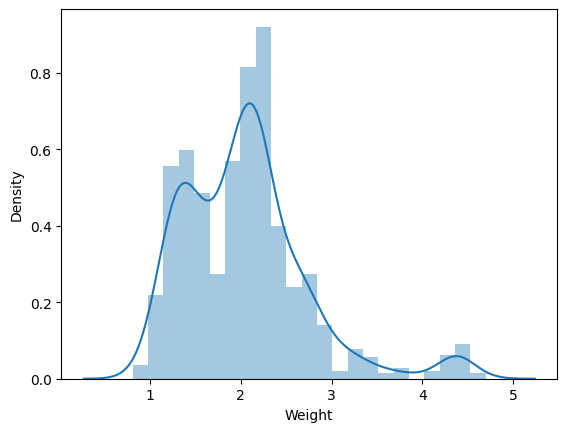

In [128]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

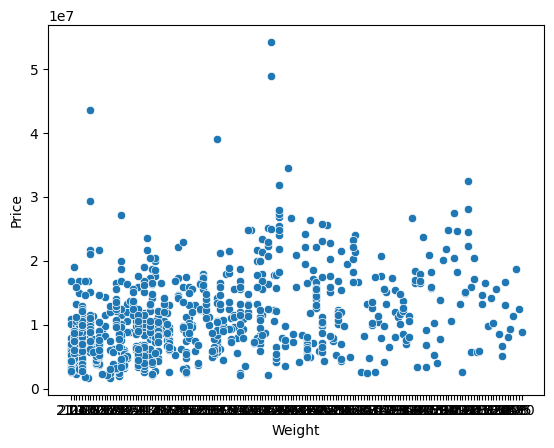

In [129]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [130]:
df.corr()['Price']

<ipython-input-130-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


RAM            0.756614
Price          1.000000
Touchscreen    0.200005
IPS            0.199816
ppi            0.469882
HDD           -0.063262
SSD            0.653812
Name: Price, dtype: float64

<ipython-input-131-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

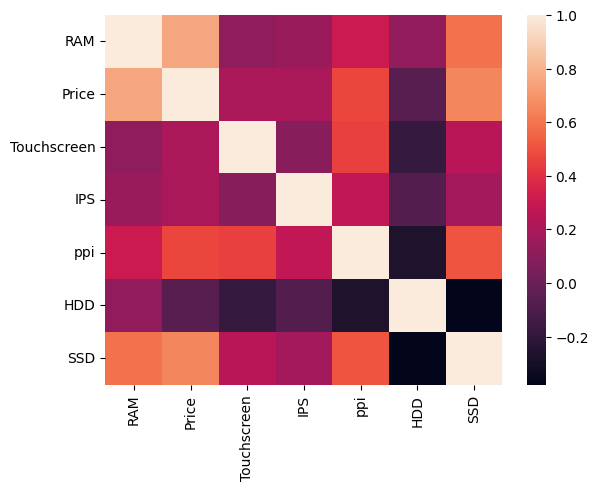

In [131]:
sns.heatmap(df.corr())

In [132]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [133]:
X

,Manufacturer,Category,RAM,Operating System,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,GPU_Name
5,Acer,Notebook,4,Windows,2.1,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Mac OS,2.04,0,1,220.534624,Intel Core i7,0,0,Intel
8,Asus,Ultrabook,16,Windows,1.3,0,0,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Windows,1.6,0,1,157.350512,Intel Core i5,0,256,Intel
13,Dell,Notebook,4,Windows,2.2,0,0,141.211998,Intel Core i3,0,256,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Gaming,32,Windows,4.42,0,0,127.335675,Intel Core i7,1000,256,Nvidia
973,Toshiba,Notebook,8,Windows,1.95,0,0,157.350512,Intel Core i5,0,256,Intel
974,Asus,Gaming,16,Windows,2.73,0,0,127.335675,Intel Core i7,1000,256,Nvidia
975,HP,Notebook,8,Windows,2.04,0,1,141.211998,Intel Core i5,1000,128,Nvidia


In [134]:
y

5      15.084372
6      16.761454
8      16.402789
9      15.739298
13     15.305313
         ...    
972    17.030282
973    16.166177
974    16.718454
975    15.979439
976    16.002661
Name: Price, Length: 841, dtype: float64

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [137]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [140]:
X

,Manufacturer,Category,RAM,Operating System,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,GPU_Name
5,Acer,Notebook,4,Windows,2.1,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Mac OS,2.04,0,1,220.534624,Intel Core i7,0,0,Intel
8,Asus,Ultrabook,16,Windows,1.3,0,0,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Windows,1.6,0,1,157.350512,Intel Core i5,0,256,Intel
13,Dell,Notebook,4,Windows,2.2,0,0,141.211998,Intel Core i3,0,256,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Gaming,32,Windows,4.42,0,0,127.335675,Intel Core i7,1000,256,Nvidia
973,Toshiba,Notebook,8,Windows,1.95,0,0,157.350512,Intel Core i5,0,256,Intel
974,Asus,Gaming,16,Windows,2.73,0,0,127.335675,Intel Core i7,1000,256,Nvidia
975,HP,Notebook,8,Windows,2.04,0,1,141.211998,Intel Core i5,1000,128,Nvidia


In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8431546458359499
MAE 0.21180755854233613


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [142]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8269283752759755
MAE 0.2221575244503207


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
